In [1]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *
import scienceplots
plt.style.use(['science', 'notebook'])

In [45]:
multwavs = [22587.95,22593.85,22613.8,22634,22659.4,22680.5,22691.75,22703,22713.25,22773.25,22783.3,22789.35,22915.25,23028.35,23067.25,23655.35,
            22920.00, 23292.60]


In [46]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-15-32-28_0.11907191236548054_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed = output_trimmed.reset_index(drop=True)
output_trimmed = output_trimmed[~output_trimmed["wave_center"].isin(multwavs)]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


5.5 9.571595114115809e-05 24
6.0 4.9155603222382126e-05 24
6.5 1.5182313271136804e-05 24
7.0 -2.838016534704059e-05 23
7.5 -5.1485438238269505e-05 23


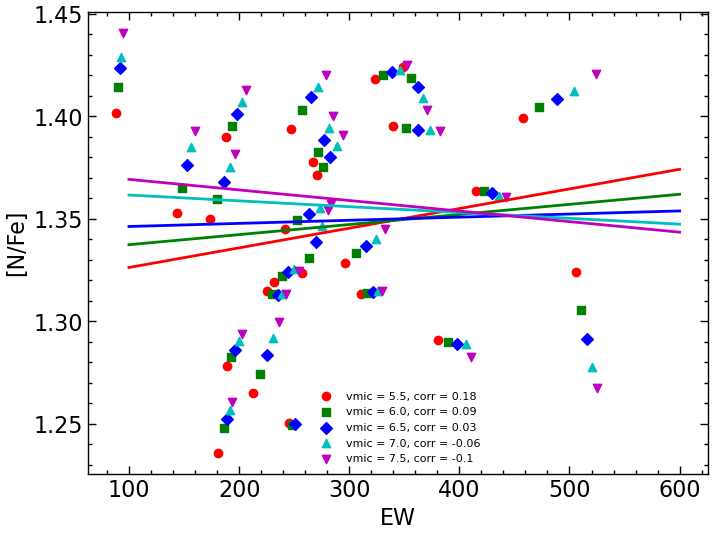

In [48]:
vmics = np.unique(output_trimmed["Microturb"].values)
cs = ['r', 'g', 'b', 'c', 'm', 'y']
markers = ['o', 's', 'D', '^', 'v', 'p']
for i in range(len(vmics)):
    vmic = vmics[i]
    output_trimmed3 = output_trimmed[output_trimmed["Microturb"] == vmic]
    ews = np.array(output_trimmed3["ew"])
    nfes = np.array(output_trimmed3["N_Fe"])
    mean_nfe = np.mean(nfes)
    std_nfe = np.std(nfes)
    choose_idxs = np.where(np.abs(nfes - mean_nfe) < 3*std_nfe)
    choose_idxs = choose_idxs[0]
    ews = ews[choose_idxs]
    nfes = nfes[choose_idxs]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    plt.scatter(ews,nfes, c=cs[i], marker = markers[i], label = f"vmic = {vmics[i]}, corr = {corr}")
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(100, 600, 100)
    y = m*x + c
    print(vmics[i], m, len(nfes))
    plt.plot(x,y, c = cs[i])
    plt.legend(fontsize = 8)
    plt.ylabel("[N/Fe]")
    plt.xlabel("EW")

In [64]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-17-56-23_0.9778841550265323_LTE_C_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [65]:
output_results_pd_df

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,C_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,HD137613.txt,22743.35,22742.0,22744.7,-0.8043,0.0,1.1738,6.5,0.0,0.0,4.849353,355.4072,0,0
1,HD137613.txt,22799.60,22798.0,22801.2,-1.7317,0.0,1.1333,6.5,0.0,0.0,7.452589,319.8972,0,0
2,HD137613.txt,22804.50,22802.0,22807.0,-2.1328,0.0,1.1773,6.5,0.0,0.0,7.068582,573.6960,0,0
3,HD137613.txt,22879.25,22877.0,22881.5,-2.5000,0.0,1.5892,6.5,0.0,0.0,516.901192,191.4586,10000,10010000


In [66]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,C_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,HD137613.txt,22743.35,22742.0,22744.7,-0.8043,0.0,1.1738,6.5,0.0,0.0,4.849353,355.4072,0,0
1,HD137613.txt,22799.60,22798.0,22801.2,-1.7317,0.0,1.1333,6.5,0.0,0.0,7.452589,319.8972,0,0
2,HD137613.txt,22804.50,22802.0,22807.0,-2.1328,0.0,1.1773,6.5,0.0,0.0,7.068582,573.6960,0,0


In [67]:
solar_abundances['C'] + np.mean(output_trimmed["C_Fe"])

np.float64(9.721466666666668)

In [57]:
np.std((output_trimmed["C_Fe"]))

np.float64(0.03444825426958844)

In [58]:
solar_abundances['N'] + np.mean(output_trimmed["N_Fe"])

np.float64(9.188366666666667)

In [71]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-17-58-56_0.3369505278663768_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [72]:
np.mean(output_trimmed["chi_squared"])

np.float64(6.3280030047779405)

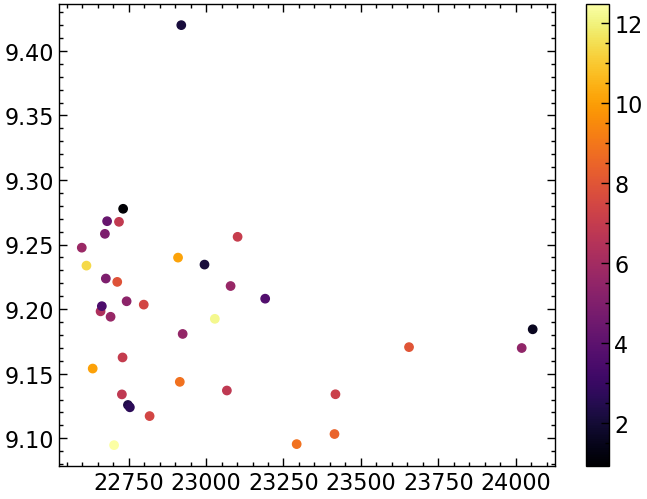

In [73]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['N_Fe']+7.98, c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [91]:
for i in range(len(output_trimmed)):    
    print(f"{output_trimmed['wave_center'].iloc[i]}  {output_trimmed['wave_start'].iloc[i]}  {output_trimmed['wave_end'].iloc[i]}")

22937.75  22936.5  22939.0
22940.75  22939.0  22942.5
22947.4  22946.0  22948.8
22966.0  22964.6  22967.4
22971.3  22969.5  22973.1
22978.5  22976.7  22980.3
23006.2  23004.5  23007.9
23015.25  23013.9  23016.6
23072.5  23070.5  23074.5
23118.9  23117.0  23120.8
23170.7  23169.7  23171.7
23199.5  23198.0  23201.0
23255.5  23253.5  23257.5
23261.3  23259.4  23263.2
23274.0  23272.0  23276.0
23280.0  23277.6  23282.4
23362.1  23360.7  23363.5
23373.0  23371.5  23374.5
23385.2  23383.2  23387.2
23421.0  23419.79  23422.2
23447.75  23446.5  23449.0
23476.045  23474.79  23477.3
23718.15  23717.0  23719.3
23731.5  23730.0  23733.0
23759.0  23757.5  23760.5
24022.6  24020.6  24024.6
24035.25  24033.5  24037.0
24065.55  24064.1  24067.0
24330.2  24328.4  24332.0
24365.15  24364.0  24366.3
24605.25  24604.0  24606.5
24683.35  24682.0  24684.7


In [92]:
(7.98+np.mean(output_trimmed['N_Fe'])).round(3), np.std(output_trimmed['N_Fe']).round(3)

KeyError: 'N_Fe'

In [93]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-18-16-47_0.7599972429435177_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [94]:
output_results_pd_df

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,O_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,HD137613.txt,23712.00,23710.40,23713.6,-0.8004,0.0,-0.0097,6.5,0.0,0.0,10.005106,542.6148,0,0
1,HD137613.txt,23753.50,23752.00,23755.0,-1.3758,0.0,0.0295,6.5,0.0,0.0,5.700532,594.4637,0,0
2,HD137613.txt,23794.95,23793.60,23796.3,-1.0262,0.0,-0.2841,6.5,0.0,0.0,6.533642,648.4755,0,0
3,HD137613.txt,24016.25,24015.00,24017.5,-0.1643,0.0,-0.1290,6.5,0.0,0.0,2.729873,593.8163,0,0
4,HD137613.txt,24099.75,24098.50,24101.0,-0.4034,0.0,-0.4731,6.5,0.0,0.0,12.433981,498.4480,0,0
5,HD137613.txt,24115.20,24113.79,24116.6,-1.0459,0.0,-0.3302,6.5,0.0,0.0,8.647543,683.9931,0,0
6,HD137613.txt,24285.75,24284.50,24287.0,-1.5221,0.0,-0.3137,6.5,0.0,0.0,1.997500,481.5586,0,0
7,HD137613.txt,24299.00,24297.50,24300.5,-1.1699,0.0,-0.3025,6.5,0.0,0.0,3.482172,540.2842,0,0
8,HD137613.txt,24393.85,24392.00,24395.7,-1.1849,0.0,-0.4025,6.5,0.0,0.0,7.436452,532.9237,0,0
9,HD137613.txt,24576.00,24574.60,24577.4,-1.1729,0.0,-0.3847,6.5,0.0,0.0,10.886499,510.7173,0,0


In [95]:
for i in range(len(output_trimmed)):    
    print(f"{output_trimmed['wave_center'].iloc[i]}  {output_trimmed['wave_start'].iloc[i]}  {output_trimmed['wave_end'].iloc[i]}")

23712.0  23710.4  23713.6
23753.5  23752.0  23755.0
23794.95  23793.6  23796.3
24016.25  24015.0  24017.5
24099.75  24098.5  24101.0
24115.2  24113.79  24116.6
24285.75  24284.5  24287.0
24299.0  24297.5  24300.5
24393.85  24392.0  24395.7
24576.0  24574.6  24577.4
24721.0  24719.0  24723.0
24837.2  24836.0  24838.4


In [76]:
(solar_abundances['O']+np.mean(output_trimmed['O_Fe'])).round(3), np.std(output_trimmed['O_Fe']).round(3)

(np.float64(8.498), np.float64(0.148))

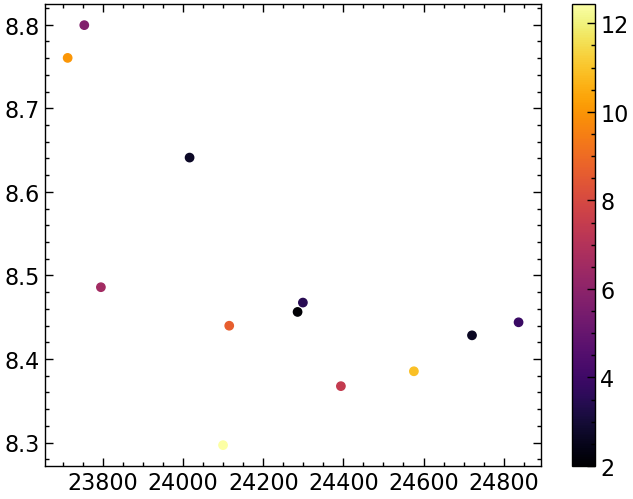

In [77]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['O_Fe']+solar_abundances['O'], c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [83]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-20-37-03_0.5447894140796702_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


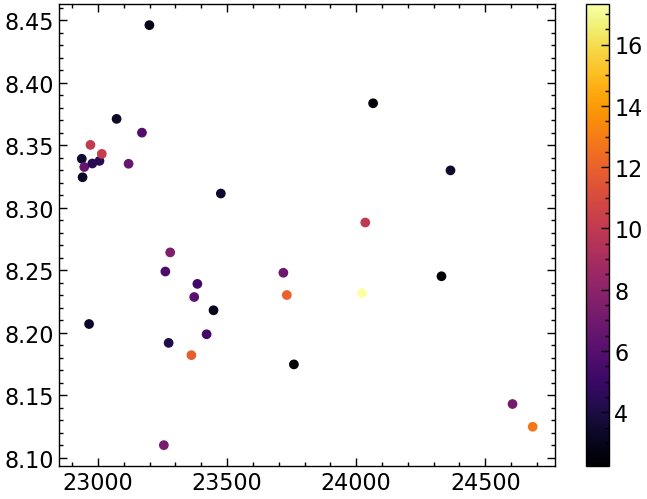

In [85]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['O_Fe']+solar_abundances['O'], c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [84]:
(solar_abundances['O']+np.mean(output_trimmed['O_Fe'])).round(3), np.std(output_trimmed['O_Fe']).round(3)

(np.float64(8.271), np.float64(0.081))

In [86]:
np.log(np.exp(8.498) + np.exp(8.271))

np.float64(9.084074523518728)

In [88]:
np.exp(8.271)/(np.exp(8.498))

np.float64(0.7969207822901407)

In [ ]:
fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/asas-rcb-21-2/vmac', sep='  ')

/tmp/ipykernel_766401/1073689475.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/asas-rcb-21-2/vmac', sep='  ')


In [ ]:
rats = np.arange(5.3,8.3,0.1)
rats = np.repeat(rats, 3)
rats

array([5.3, 5.3, 5.3, 5.4, 5.4, 5.4, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.7,
       5.7, 5.7, 5.8, 5.8, 5.8, 5.9, 5.9, 5.9, 6. , 6. , 6. , 6.1, 6.1,
       6.1, 6.2, 6.2, 6.2, 6.3, 6.3, 6.3, 6.4, 6.4, 6.4, 6.5, 6.5, 6.5,
       6.6, 6.6, 6.6, 6.7, 6.7, 6.7, 6.8, 6.8, 6.8, 6.9, 6.9, 6.9, 7. ,
       7. , 7. , 7.1, 7.1, 7.1, 7.2, 7.2, 7.2, 7.3, 7.3, 7.3, 7.4, 7.4,
       7.4, 7.5, 7.5, 7.5, 7.6, 7.6, 7.6, 7.7, 7.7, 7.7, 7.8, 7.8, 7.8,
       7.9, 7.9, 7.9, 8. , 8. , 8. , 8.1, 8.1, 8.1, 8.2, 8.2, 8.2, 8.3,
       8.3, 8.3])

In [ ]:
len(rats)

93

In [ ]:
# Extract the last row
last_row = fitlist.iloc[-1]

# Create a new DataFrame by repeating the last row n times
new_rows = pd.DataFrame([last_row] * (len(rats) - len(fitlist)), columns=fitlist.columns)

# Append the new rows to the original DataFrame
fitlist2 = pd.concat([fitlist, new_rows], ignore_index=True)

fitlist2['oisorat'] = rats
fitlist2

,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(Ca),A(O),A(Na),A(S),A(Fe),A(N),A(Mg),A(Si),oisorat
0,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,5.3
1,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,5.3
2,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,5.3
3,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,5.4
4,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,8.2
89,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,8.2
90,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,8.3
91,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,8.3


In [ ]:
fitlist2.to_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/asas-rcb-21-2/fitlist_asas-rcb-21-comb-finer', sep=' ', index=False)

In [ ]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-11-50-43_0.03363268036537814_LTE_O_1D/output'
df1 = pd.read_csv(allpath, sep='\t')
# allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-10-19-06_0.7760709184924286_LTE_O_1D/output'
# df2 = pd.read_csv(allpath, sep='\t')


In [ ]:
# df_fine = pd.concat([df1,df2])
df_fine = df1
df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])

In [ ]:
np.max(df_fine['Doppler_Shift_add_to_RV'])

np.float64(0.0713896905032964)

In [ ]:
rats = np.unique(df_fine['oisorat'])
chis, dchis, oabunds, doabunds = [], [], [], []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

6.85 -1.77 2.3


Text(0.5, 0, '16O/18O ratio')

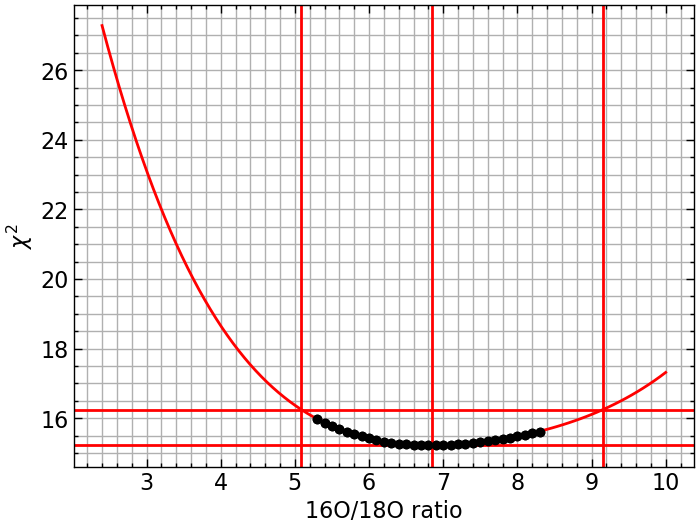

In [ ]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
# plt.axhline(np.min(chis), ls='--', color='r')
# plt.axhline(np.min(chis)+1.0, ls='--', color='r')
# plt.axvline(3.4)
plt.grid(which='both')

# fit a 3rd degree polynomial weighted by the errors
p = np.polyfit(rats, chis, 4, w=1/np.array(dchis))
x = np.linspace(2.4,10,100)
y = np.polyval(p, x)
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')
print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# find x values nearest to ybounds


In [ ]:
o16rats = rats/(1+rats)
o16s =  (8.77 + np.array(oabunds)) + np.log(o16rats)

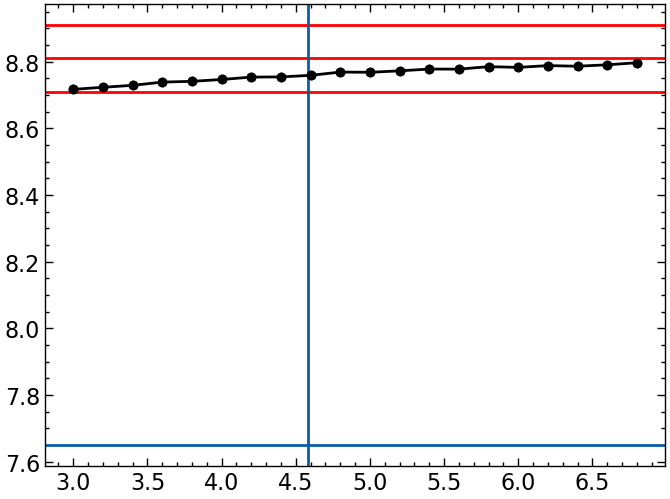

In [ ]:
plt.plot(rats, np.array(oabunds)+8.77, 'ko-')
plt.errorbar(rats, np.array(oabunds)+8.77, yerr=doabunds, fmt='ko', capsize=3)
plt.axhline(8.77-1.12)
plt.axhline(8.81, color='r')
plt.axhline(8.81-0.1, color='r')
plt.axhline(8.81+0.1, color='r')
plt.axvline(4.58)

In [ ]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-04-44-54_0.014775651587911276_LTE_O_1D/output'
df1 = pd.read_csv(allpath, sep='\t')
# df_fine = pd.concat([df1,df2])
df_fine = df1
df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])
rats = np.unique(df_fine['oisorat'])
chis, dchis, oabunds, doabunds = [], [], [], []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

5.85 0.58 -0.67


Text(0.5, 0, '16O/18O ratio')

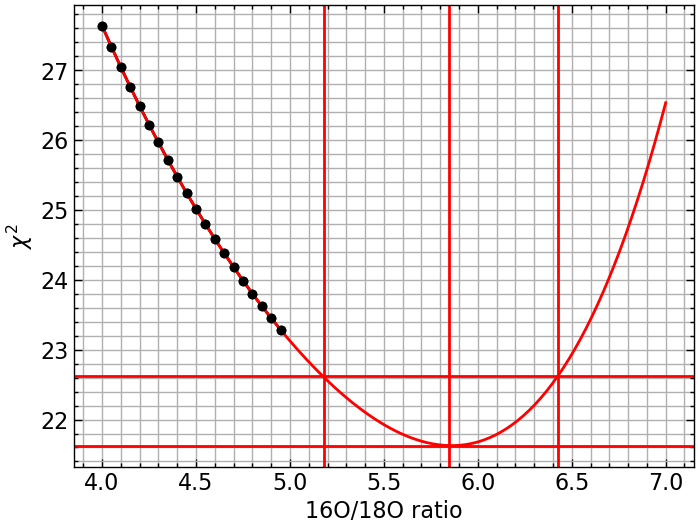

In [ ]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
# plt.axhline(np.min(chis), ls='--', color='r')
# plt.axhline(np.min(chis)+1.0, ls='--', color='r')
# plt.axvline(3.4)
plt.grid(which='both')

# fit a 3rd degree polynomial weighted by the errors
p = np.polyfit(rats, chis, 4, w=1/np.array(dchis))
x = np.linspace(4,7,100)
y = np.polyval(p, x)
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')
print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# find x values nearest to ybounds


In [ ]:
fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/asas-rcb-21-2/vmac', sep='  ')

/tmp/ipykernel_766401/1073689475.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/asas-rcb-21-2/vmac', sep='  ')


In [ ]:
rats = np.arange(5.3,8.3,0.1)
rats = np.repeat(rats, 3)
rats

array([5.3, 5.3, 5.3, 5.4, 5.4, 5.4, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.7,
       5.7, 5.7, 5.8, 5.8, 5.8, 5.9, 5.9, 5.9, 6. , 6. , 6. , 6.1, 6.1,
       6.1, 6.2, 6.2, 6.2, 6.3, 6.3, 6.3, 6.4, 6.4, 6.4, 6.5, 6.5, 6.5,
       6.6, 6.6, 6.6, 6.7, 6.7, 6.7, 6.8, 6.8, 6.8, 6.9, 6.9, 6.9, 7. ,
       7. , 7. , 7.1, 7.1, 7.1, 7.2, 7.2, 7.2, 7.3, 7.3, 7.3, 7.4, 7.4,
       7.4, 7.5, 7.5, 7.5, 7.6, 7.6, 7.6, 7.7, 7.7, 7.7, 7.8, 7.8, 7.8,
       7.9, 7.9, 7.9, 8. , 8. , 8. , 8.1, 8.1, 8.1, 8.2, 8.2, 8.2, 8.3,
       8.3, 8.3])

In [ ]:
len(rats)

93

In [ ]:
# Extract the last row
last_row = fitlist.iloc[-1]

# Create a new DataFrame by repeating the last row n times
new_rows = pd.DataFrame([last_row] * (len(rats) - len(fitlist)), columns=fitlist.columns)

# Append the new rows to the original DataFrame
fitlist2 = pd.concat([fitlist, new_rows], ignore_index=True)

fitlist2['oisorat'] = rats
fitlist2

,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(Ca),A(O),A(Na),A(S),A(Fe),A(N),A(Mg),A(Si),oisorat
0,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,5.3
1,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,5.3
2,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,5.3
3,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,5.4
4,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,8.2
89,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,8.2
90,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,8.3
91,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,8.3


In [ ]:
fitlist2.to_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/asas-rcb-21-2/fitlist_asas-rcb-21-comb-finer', sep=' ', index=False)

In [ ]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-11-50-43_0.03363268036537814_LTE_O_1D/output'
df1 = pd.read_csv(allpath, sep='\t')
# allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-10-19-06_0.7760709184924286_LTE_O_1D/output'
# df2 = pd.read_csv(allpath, sep='\t')


In [ ]:
# df_fine = pd.concat([df1,df2])
df_fine = df1
df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])

In [ ]:
np.max(df_fine['Doppler_Shift_add_to_RV'])

np.float64(0.0713896905032964)

In [ ]:
rats = np.unique(df_fine['oisorat'])
chis, dchis, oabunds, doabunds = [], [], [], []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

6.85 -1.77 2.3


Text(0.5, 0, '16O/18O ratio')

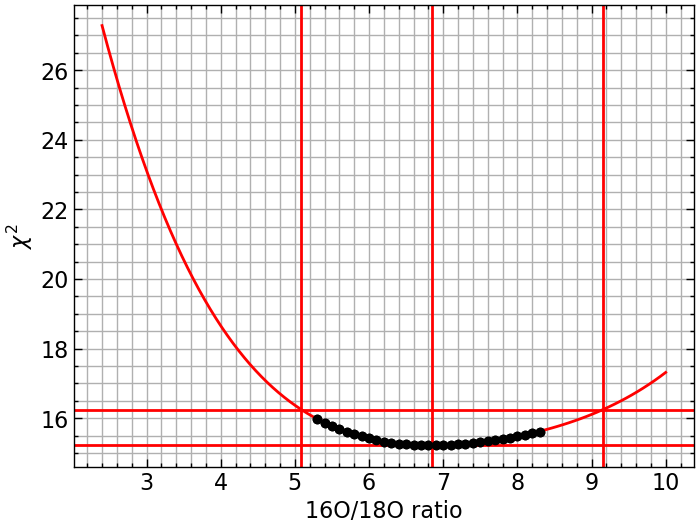

In [ ]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
# plt.axhline(np.min(chis), ls='--', color='r')
# plt.axhline(np.min(chis)+1.0, ls='--', color='r')
# plt.axvline(3.4)
plt.grid(which='both')

# fit a 3rd degree polynomial weighted by the errors
p = np.polyfit(rats, chis, 4, w=1/np.array(dchis))
x = np.linspace(2.4,10,100)
y = np.polyval(p, x)
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')
print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# find x values nearest to ybounds


In [ ]:
o16rats = rats/(1+rats)
o16s =  (8.77 + np.array(oabunds)) + np.log(o16rats)

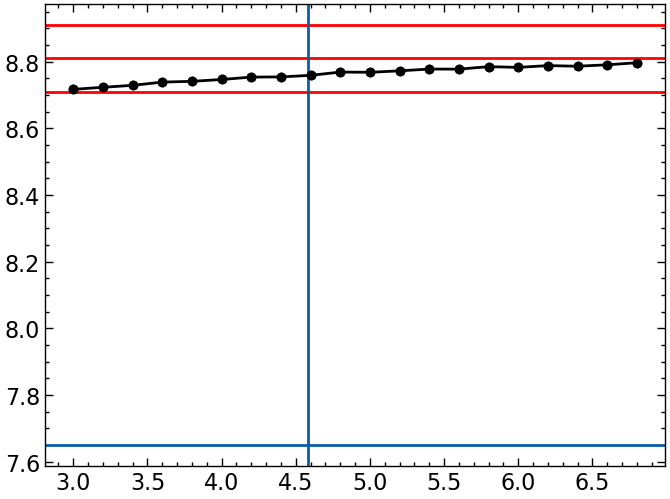

In [ ]:
plt.plot(rats, np.array(oabunds)+8.77, 'ko-')
plt.errorbar(rats, np.array(oabunds)+8.77, yerr=doabunds, fmt='ko', capsize=3)
plt.axhline(8.77-1.12)
plt.axhline(8.81, color='r')
plt.axhline(8.81-0.1, color='r')
plt.axhline(8.81+0.1, color='r')
plt.axvline(4.58)

In [ ]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-04-44-54_0.014775651587911276_LTE_O_1D/output'
df1 = pd.read_csv(allpath, sep='\t')
# df_fine = pd.concat([df1,df2])
df_fine = df1
df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])
rats = np.unique(df_fine['oisorat'])
chis, dchis, oabunds, doabunds = [], [], [], []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

5.85 0.58 -0.67


Text(0.5, 0, '16O/18O ratio')

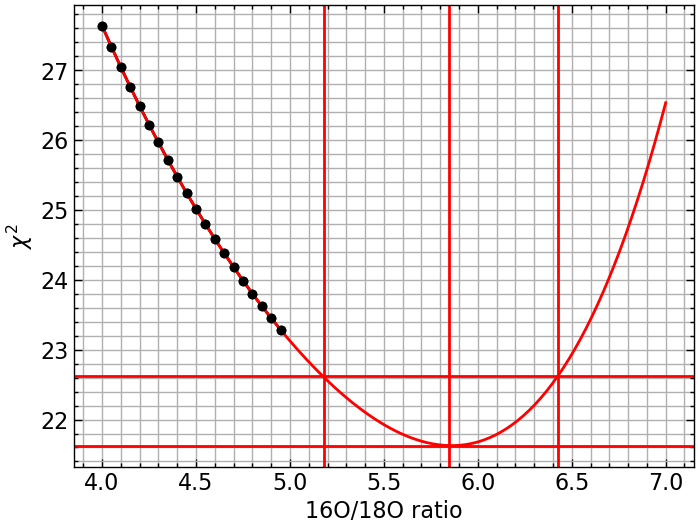

In [ ]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
# plt.axhline(np.min(chis), ls='--', color='r')
# plt.axhline(np.min(chis)+1.0, ls='--', color='r')
# plt.axvline(3.4)
plt.grid(which='both')

# fit a 3rd degree polynomial weighted by the errors
p = np.polyfit(rats, chis, 4, w=1/np.array(dchis))
x = np.linspace(4,7,100)
y = np.polyval(p, x)
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')
print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# find x values nearest to ybounds
